# Project Overview

### Industrial safety and Health-NLP based Chatbot.


* The main Aim of the project is to predict and design a ML/DL based chatbot utility which can help the proffessionals to highlight the safety risk as per the incident description by predicting Accident level/Potential accident level from the dataset.

In [1]:
#Importing the basic libraries
import pandas as pd
import numpy as np

In [2]:
#Importing the data
data = pd.read_csv("Industrial_Safety.csv")

In [3]:
data

Unnamed: 0            Data   Countries     Local Industry Sector  \
0             0   1/1/2016 0:00  Country_01  Local_01          Mining   
1             1   1/2/2016 0:00  Country_02  Local_02          Mining   
2             2   1/6/2016 0:00  Country_01  Local_03          Mining   
3             3   1/8/2016 0:00  Country_01  Local_04          Mining   
4             4  1/10/2016 0:00  Country_01  Local_04          Mining   
..          ...             ...         ...       ...             ...   
420         434   7/4/2017 0:00  Country_01  Local_04          Mining   
421         435   7/4/2017 0:00  Country_01  Local_03          Mining   
422         436   7/5/2017 0:00  Country_02  Local_09          Metals   
423         437   7/6/2017 0:00  Country_02  Local_05          Metals   
424         438   7/9/2017 0:00  Country_01  Local_04          Mining   

    Accident Level Potential Accident Level   Genre Employee or Third Party  \
0                I                       IV    Male             Third Party   
1                I                       IV    Male                Employee   
2                I                      III    Male    Third Party (Remote)   
3                I                        I    Male             Third Party   
4               IV                       IV    Male             Third Party   
..             ...                      ...     ...                     ...   
420              I                      III    Male             Third Party   
421              I                       II  Female                Employee   
422              I                       II    Male                Employee   
423              I                       II    Male                Employee   
424              I                       II  Female             Third Party   

                    Critical Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
420                        Others   
421                        Others   
422              Venomous Animals   
423                           Cut   
424  Fall prevention (same level)   

                                           Description  
0    While removing the drill rod of the Jumbo 08 f...  
1    During the activation of a sodium sulphide pum...  
2    In the sub-station MILPO located at level +170...  
3    Being 9:45 am. approximately in the Nv. 1880 C...  
4    Approximately at 11:45 a.m. in circumstances t...  
..                                                 ...  
420  Being approximately 5:00 a.m. approximately, w...  
421  The collaborator moved from the infrastructure...  
422  During the environmental monitoring activity i...  
423  The Employee performed the activity of strippi...  
424  At 10:00 a.m., when the assistant cleaned the ...  

[425 rows x 11 columns]

### Data Exploration/Cleansing

In [4]:
#Lets remove the "Unnamed" column
data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
#Rename the columns
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Industry Sector':'Industry_Sector', 'Accident Level':'Accident_Level', 'Potential Accident Level':'Potential_Accident_Level', 'Genre':'Gender', 'Employee or Third Party':'Employee_type', 'Critical Risk': 'Critical_Risk'}, inplace=True)

In [6]:
#shape
data.shape

(425, 10)

In [7]:
#Columns
data.columns

Index(['Date', 'Country', 'Local', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Gender', 'Employee_type', 'Critical_Risk',
       'Description'],
      dtype='object')

In [8]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry_Sector           425 non-null    object
 4   Accident_Level            425 non-null    object
 5   Potential_Accident_Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee_type             425 non-null    object
 8   Critical_Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


* From the above output we observe all column datatypes is object and are categorical columns.

* Also, as all the columns are categorical the data is free from outliers

In [9]:
#Check Duplictes
data.duplicated().sum()

7

In [10]:
duplicates = data.duplicated()
data[duplicates]

Date     Country     Local Industry_Sector Accident_Level  \
77    4/1/2016 0:00  Country_01  Local_01          Mining              I   
262  12/1/2016 0:00  Country_01  Local_03          Mining              I   
303  1/21/2017 0:00  Country_02  Local_02          Mining              I   
345   3/2/2017 0:00  Country_03  Local_10          Others              I   
346   3/2/2017 0:00  Country_03  Local_10          Others              I   
355  3/15/2017 0:00  Country_03  Local_10          Others              I   
397  5/23/2017 0:00  Country_01  Local_04          Mining              I   

    Potential_Accident_Level Gender         Employee_type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical_Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

* As we observed there are duplicate rows lets remove/drop from the data.

In [11]:
#Drop Duplicates
data.drop_duplicates(inplace = True)

In [12]:
data.shape

(418, 10)

In [13]:
#Check missing Values
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry_Sector             0
Accident_Level              0
Potential_Accident_Level    0
Gender                      0
Employee_type               0
Critical_Risk               0
Description                 0
dtype: int64

* We can observe that there are no missing values in the data

In [14]:
import pandas_profiling

In [15]:
#Lets do analysis using pandas profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
#Unique values
data.nunique()

Date                        287
Country                       3
Local                        12
Industry_Sector               3
Accident_Level                5
Potential_Accident_Level      6
Gender                        2
Employee_type                 3
Critical_Risk                33
Description                 411
dtype: int64

* Lets do some analysis on columns from the data:
* Observe the unique values and the count in each column.
* There are 411 unique values in Description value out of 418 which means the are few duplicates in column Description.

In [17]:
#check for duplicates
data[data.duplicated(subset=['Description'],keep=False)].sort_values(by='Description')

Date     Country     Local Industry_Sector Accident_Level  \
166   7/7/2016 0:00  Country_01  Local_03          Mining             IV   
167   7/7/2016 0:00  Country_01  Local_03          Mining              I   
261  12/1/2016 0:00  Country_01  Local_03          Mining              I   
263  12/1/2016 0:00  Country_01  Local_03          Mining              I   
412  6/20/2017 0:00  Country_01  Local_01          Mining              I   
413  6/20/2017 0:00  Country_01  Local_01          Mining              I   
130  5/26/2016 0:00  Country_03  Local_10          Others              I   
131  5/26/2016 0:00  Country_03  Local_10          Others              I   
143   6/8/2016 0:00  Country_03  Local_10          Others              I   
144   6/8/2016 0:00  Country_03  Local_10          Others              I   
387   5/6/2017 0:00  Country_02  Local_07          Mining             IV   
388   5/6/2017 0:00  Country_02  Local_07          Mining             II   
37   2/24/2016 0:00  Country_02  Local_07          Mining              I   
38   2/24/2016 0:00  Country_02  Local_07          Mining              I   

    Potential_Accident_Level  Gender Employee_type Critical_Risk  \
166                        V    Male   Third Party        Others   
167                       IV    Male   Third Party        Others   
261                       IV    Male      Employee        Others   
263                       IV    Male   Third Party        Others   
412                       IV    Male      Employee        Others   
413                       IV    Male   Third Party        Others   
130                        I    Male   Third Party          Bees   
131                        I    Male      Employee        Others   
143                        I    Male   Third Party          Bees   
144                        I    Male   Third Party        Others   
387                        V    Male      Employee    Projection   
388                        V    Male      Employee    Projection   
37                         V    Male      Employee        Others   
38                         V  Female   Third Party        Others   

                                           Description  
166  At moments when the MAPERU truck of plate F1T ...  
167  At moments when the MAPERU truck of plate F1T ...  
261  During the activity of chuteo of ore in hopper...  
263  During the activity of chuteo of ore in hopper...  
412  In circumstance, the AHK-903 license plate (Em...  
413  In circumstance, the AHK-903 license plate (Em...  
130  In the geological reconnaissance activity, in ...  
131  In the geological reconnaissance activity, in ...  
143  Project of Vazante that carried out sediment c...  
144  Project of Vazante that carried out sediment c...  
387  The employees Márcio and Sérgio performed the ...  
388  The employees Márcio and Sérgio performed the ...  
37   When starting the activity of removing a coil ...  
38   When starting the activity of removing a coil ...

In [18]:
#Drop duplicates from column
data.drop_duplicates(subset=['Description'], keep='first', inplace=True)

In [19]:
data.shape

(411, 10)

In [20]:
for col in data:
    print(f'Unique values for {col} is:\n{data[col].unique()} \n Unique Value count is: \n{data[col].value_counts()}\n')

Unique values for Date is:
['1/1/2016 0:00' '1/2/2016 0:00' '1/6/2016 0:00' '1/8/2016 0:00'
 '1/10/2016 0:00' '1/12/2016 0:00' '1/16/2016 0:00' '1/17/2016 0:00'
 '1/19/2016 0:00' '1/26/2016 0:00' '1/28/2016 0:00' '1/30/2016 0:00'
 '2/1/2016 0:00' '2/2/2016 0:00' '2/4/2016 0:00' '2/6/2016 0:00'
 '2/7/2016 0:00' '2/8/2016 0:00' '2/21/2016 0:00' '2/25/2016 0:00'
 '2/9/2016 0:00' '2/10/2016 0:00' '2/15/2016 0:00' '2/14/2016 0:00'
 '2/13/2016 0:00' '2/16/2016 0:00' '2/17/2016 0:00' '2/19/2016 0:00'
 '2/20/2016 0:00' '2/18/2016 0:00' '2/22/2016 0:00' '2/24/2016 0:00'
 '2/29/2016 0:00' '2/26/2016 0:00' '2/27/2016 0:00' '3/2/2016 0:00'
 '3/3/2016 0:00' '3/4/2016 0:00' '3/5/2016 0:00' '3/6/2016 0:00'
 '3/9/2016 0:00' '3/11/2016 0:00' '3/13/2016 0:00' '3/12/2016 0:00'
 '3/14/2016 0:00' '3/16/2016 0:00' '3/10/2016 0:00' '3/17/2016 0:00'
 '3/18/2016 0:00' '3/19/2016 0:00' '3/22/2016 0:00' '3/25/2016 0:00'
 '3/30/2016 0:00' '3/31/2016 0:00' '4/1/2016 0:00' '4/3/2016 0:00'
 '4/2/2016 0:00' '3/24/201

##### Description 
* Number of Data points: 411
* Number of attributes: 10


## Data Pre-processing

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly
import plotly.express as px
import plotly.graph_objects as go
import dabl

In [22]:
data.describe(include=['object'])

Date     Country     Local Industry_Sector Accident_Level  \
count             411         411       411             411            411   
unique            287           3        12               3              5   
top     2/8/2017 0:00  Country_01  Local_03          Mining              I   
freq                6         245        87             232            303   

       Potential_Accident_Level Gender Employee_type Critical_Risk  \
count                       411    411           411           411   
unique                        6      2             3            33   
top                          IV   Male   Third Party        Others   
freq                        138    390           180           223   

                                              Description  
count                                                 411  
unique                                                411  
top     During the maintenance on the LX-P-205B pump, ...  
freq                                                    1

##### Observations:
   * Country_01 has most number of accidents happen.
   * Male gender and Third party employees are major in the accident.

In [23]:
# sns.countplot(data['Gender'])
# px.bar(data['Gender'].value_counts(),color ='variable', height=400,width=800)

* Lets convert the Date column to year,month,day,weekday

In [24]:
#Convert into additional features
import time
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['Weekday'] = data.Date.apply(lambda x : x.day_name())
data.tail(5)

Date     Country     Local Industry_Sector Accident_Level  \
420 2017-07-04  Country_01  Local_04          Mining              I   
421 2017-07-04  Country_01  Local_03          Mining              I   
422 2017-07-05  Country_02  Local_09          Metals              I   
423 2017-07-06  Country_02  Local_05          Metals              I   
424 2017-07-09  Country_01  Local_04          Mining              I   

    Potential_Accident_Level  Gender Employee_type  \
420                      III    Male   Third Party   
421                       II  Female      Employee   
422                       II    Male      Employee   
423                       II    Male      Employee   
424                       II  Female   Third Party   

                    Critical_Risk  \
420                        Others   
421                        Others   
422              Venomous Animals   
423                           Cut   
424  Fall prevention (same level)   

                                           Description  Year  Month  Day  \
420  Being approximately 5:00 a.m. approximately, w...  2017      7    4   
421  The collaborator moved from the infrastructure...  2017      7    4   
422  During the environmental monitoring activity i...  2017      7    5   
423  The Employee performed the activity of strippi...  2017      7    6   
424  At 10:00 a.m., when the assistant cleaned the ...  2017      7    9   

       Weekday  
420    Tuesday  
421    Tuesday  
422  Wednesday  
423   Thursday  
424     Sunday

In [25]:
#Lets convert the year column to quarter.
def month(x):
    if x in [1,2,3]:
        quarter = 'First'
    elif x in [4,5,6]:
        quarter = 'Second'
    elif x in [7,8,9]:
        quarter = 'Third'
    elif x in [10,11,12]:
        quarter = 'Forth'
    return quarter
data['Quarter'] = data['Month'].apply(month)
data.head(5)

Date     Country     Local Industry_Sector Accident_Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential_Accident_Level Gender         Employee_type        Critical_Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday Quarter  
0     Friday   First  
1   Saturday   First  
2  Wednesday   First  
3     Friday   First  
4     Sunday   First

In [26]:
data.shape

(411, 15)

## Exploratory Data Analysis (EDA)



### Let's analyze the data for Univariate, bivariate analysis:

In [27]:
labels = data['Country'].unique()
values = data['Country'].value_counts()
fig = px.pie(data, names='Country',height=None,width=None)
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.show()

* Country_01 has effected more number of accidents

In [28]:
px.bar(data, x=data["Gender"],color="Gender", title="Gender_count",height=400,width=700)

* Male count is high so data is more biased to male employees.

In [29]:
import plotly.graph_objects as go

x = data['Gender'].unique()
y = data['Gender'].value_counts()

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(x=x, y=y, text=y,textposition=None,)])
fig.show()

In [30]:
px.bar(data.Industry_Sector, color="value",height=400,width=700)

* Mining industry has more number of accidents

In [31]:
px.bar((data.Critical_Risk[~data['Critical_Risk'].isin([''])].value_counts()),height=600,width=750)

* Most of the Critical Risks are occured due to 'Others' hence there are too many risks we need to consider.

In [32]:
#For Univariate analysis
import ipywidgets 
from ipywidgets import interact
from ipywidgets import interact_manual
@interact_manual
def viz(x = list(data.select_dtypes('object').columns[1:])):
    sns.countplot(data[x])

interactive(children=(Dropdown(description='x', options=('Local', 'Industry_Sector', 'Accident_Level', 'Potent…

#### Univariate analysis

##### Local 
    Local_03 has maximum number of accidents. 
##### Accident_Level
    Level-1 have more accidents which are minor and Level-5 accidents are severe.
##### Potential_Accident_Level
    Potential accident levevel indicates how severe the accident is and has the highest count in Level-4.
##### Employee_Type
    Employee type indicates which employee has effected more. it is observed that Employees and Third party employees are effected more.

In [33]:
## Bivariate analysis for categorical values with Dash
@interact_manual
def viz(x = list(data.select_dtypes('object').columns), y = list(data.select_dtypes('object').columns)[1:]):
    pd.crosstab(data[x], data[y]).plot(kind = 'bar', stacked = True)

interactive(children=(Dropdown(description='x', options=('Country', 'Local', 'Industry_Sector', 'Accident_Leve…

##### Bivariate analysis Observations:

##### 'Potential accident level' by 'Country'
    Country_01 has more number of severe accidents in Level IV
    Country_02 has moderate accidents across all the levels
    Country_03 level-I accident count is more compared to country_01 and 02 but less severe accidents.
##### 'Local' by 'Potential accident level'
    Local_03 is where most of the accidents happen
##### 'Potential Accident level counts' by 'Employee_Type'
    Third Party Employees are more effected in Accidents. We can observe that people are also facing severe accidents in Accident_Level_IV.
##### 'Industry_sector' by 'Local' 
    Industry Sector depends on the Local area.
    Local Area 1,2,3,4 and 7 belong to Mining Sector.
    Local Area 5,6,8 and 9 belong to Metal Sector.
    Local Area 10, 11 and 12 belong to Other Sectors.
##### 'Potential Accident level' by 'Gender'
    Males are more involved in Severe Accidents 

In [34]:
# ## Categorical vs Numerical Variables
# @interact_manual
# def viz(x = list(data.select_dtypes('object').columns[1:]),
#        y = list(data.select_dtypes('number').columns)[1:]):
#     sns.barplot(data[x], data[y])

In [35]:
# Multivariate Analysis

@interact_manual
def viz(x = list(data.select_dtypes('object').columns),
       y = list(data.select_dtypes('number').columns),
       hue = list(data.select_dtypes('object').columns[1:])):
    sns.barplot(data[x], data[y], hue = data[hue])

interactive(children=(Dropdown(description='x', options=('Country', 'Local', 'Industry_Sector', 'Accident_Leve…

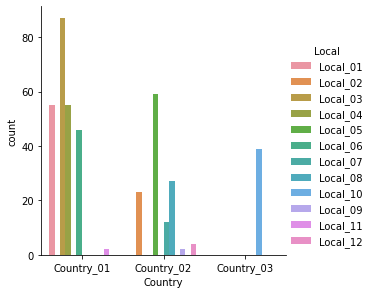

In [36]:
plot = sns.factorplot(data=data, kind="count", x="Country", hue = "Local", size=4, aspect=1)

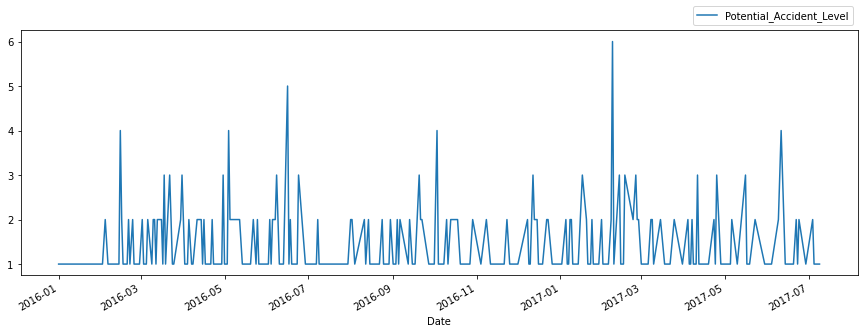

In [37]:
data.groupby('Date').count()['Potential_Accident_Level'].plot(figsize=(15,5))
plt.legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.5)

* Potential accident level with respect to Date
* We can also observe that accidents are from 1st Jan 2016 to 9th July 2017 in every month. 

In [38]:
# getMostCommonWords(data.Description, 20)

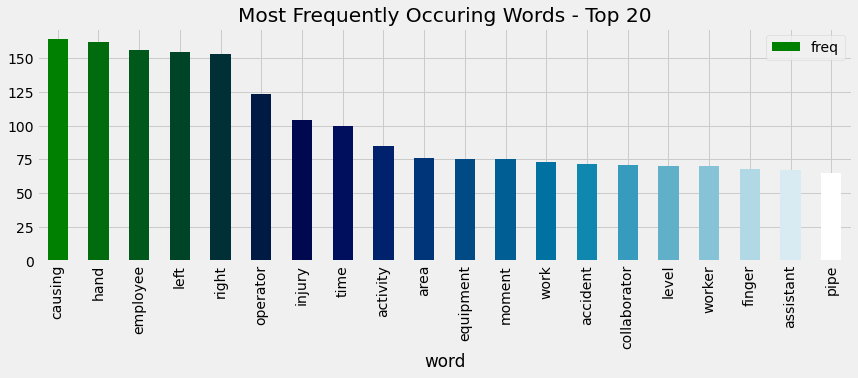

In [39]:
## Visualizing the Most Frequent Words from Description column

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Description)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(13, 4), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

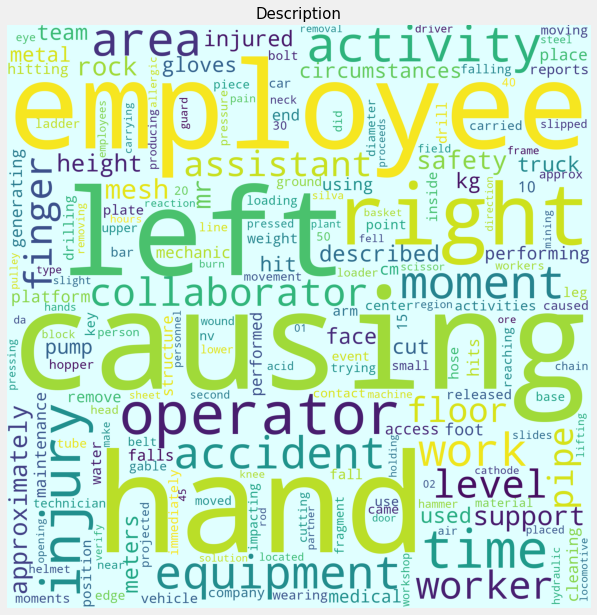

In [40]:
# lets plot the Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.Description)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Description", fontsize = 15)
plt.show()

* Above plot indicates the visualization of the most frequent Words from 'Description' column

### NLP Pre-processing

In [41]:
data.copy()

Date     Country     Local Industry_Sector Accident_Level  \
0   2016-01-01  Country_01  Local_01          Mining              I   
1   2016-01-02  Country_02  Local_02          Mining              I   
2   2016-01-06  Country_01  Local_03          Mining              I   
3   2016-01-08  Country_01  Local_04          Mining              I   
4   2016-01-10  Country_01  Local_04          Mining             IV   
..         ...         ...       ...             ...            ...   
420 2017-07-04  Country_01  Local_04          Mining              I   
421 2017-07-04  Country_01  Local_03          Mining              I   
422 2017-07-05  Country_02  Local_09          Metals              I   
423 2017-07-06  Country_02  Local_05          Metals              I   
424 2017-07-09  Country_01  Local_04          Mining              I   

    Potential_Accident_Level  Gender         Employee_type  \
0                         IV    Male           Third Party   
1                         IV    Male              Employee   
2                        III    Male  Third Party (Remote)   
3                          I    Male           Third Party   
4                         IV    Male           Third Party   
..                       ...     ...                   ...   
420                      III    Male           Third Party   
421                       II  Female              Employee   
422                       II    Male              Employee   
423                       II    Male              Employee   
424                       II  Female           Third Party   

                    Critical_Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
420                        Others   
421                        Others   
422              Venomous Animals   
423                           Cut   
424  Fall prevention (same level)   

                                           Description  Year  Month  Day  \
0    While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1    During the activation of a sodium sulphide pum...  2016      1    2   
2    In the sub-station MILPO located at level +170...  2016      1    6   
3    Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4    Approximately at 11:45 a.m. in circumstances t...  2016      1   10   
..                                                 ...   ...    ...  ...   
420  Being approximately 5:00 a.m. approximately, w...  2017      7    4   
421  The collaborator moved from the infrastructure...  2017      7    4   
422  During the environmental monitoring activity i...  2017      7    5   
423  The Employee performed the activity of strippi...  2017      7    6   
424  At 10:00 a.m., when the assistant cleaned the ...  2017      7    9   

       Weekday Quarter  
0       Friday   First  
1     Saturday   First  
2    Wednesday   First  
3       Friday   First  
4       Sunday   First  
..         ...     ...  
420    Tuesday   Third  
421    Tuesday   Third  
422  Wednesday   Third  
423   Thursday   Third  
424     Sunday   Third  

[411 rows x 15 columns]

In [42]:
# Checking for Empty Strings in the Description Column
empty_list= []
for empty, Data in enumerate(data.Description):
    if len(Data) == 0:
        empty_list.append(empty)
print(empty_list)

[]


* So we don't have any empty strings. Lets Start processing our text.

In [43]:
data.Description.value_counts()

During the maintenance on the LX-P-205B pump, there was the projection of silicate pulp, reaching the right leg of the employee.                                                                                                                                                                                                                                                                                                         1
At level 3450 access 4 A2, the operator of the Scissor # 200 performed the support of the crown, at which time a piece of rock (13cmx6cmx2cm; 54g) passes between the cocada of the support mesh, from a height of 1.60 meters, towards the platform of the team breaking into particles one of which reaches his right eye causing the injury.                                                                                          1
The employee was descending the ladder after inspection of the milling cyclones, which gives access to the floor behind the mill 10 by platform # 

* Description indicates the cause of accidents

In [44]:
data['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

- Converting the description column to lower case.
- Removing punctuations and Tags.
- Removing empty tokens and one letter

In [45]:
#NLP libraries for preprocessing
import string
import re
import itertools
import nltk
import unicodedata
import unidecode
from nltk.corpus import stopwords
from nltk import tokenize, stem
from nltk.tokenize import word_tokenize

def clean_text(text):
    # lower text
    text = text.lower()

    # Remove Html Tags like <br>
    text= re.sub(r'<[^>]+>' , "", text)

    # Remove puncutation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Lemmatizer 
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Remove Stopwords
    stopwords = nltk.corpus.stopwords.words('english')

    # Remove accented and special chracters
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()

    # Consider the words which are not in stopwords and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    # Remove words with only one letter
    text = [t for t in lems if len(t)>2]

    return text

In [46]:
# New feature
text = clean_text(' '.join(data['Description'].sum().split()))
data['Updated_Description'] = data.apply(lambda x: " ".join(clean_text(x.Description)), axis=1)

In [47]:
data["Updated_Description"][0]

'removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo'

In [48]:
# data['Description'][0]

In [50]:
data.head(5)

Date     Country     Local Industry_Sector Accident_Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential_Accident_Level Gender         Employee_type        Critical_Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday Quarter                                Updated_Description  
0     Friday   First  removing drill rod jumbo maintenance superviso...  
1   Saturday   First  activation sodium sulphide pump piping uncoupl...  
2  Wednesday   First  substation milpo located level collaborator ex...  
3     Friday   First  approximately personnel begin task unlocking s...  
4     Sunday   First  approximately circumstance mechanic anthony gr...